[[  34 3273]
 [  34   74]
 [2291   74]
 [2291 3273]]
0.0 (34, 3273)


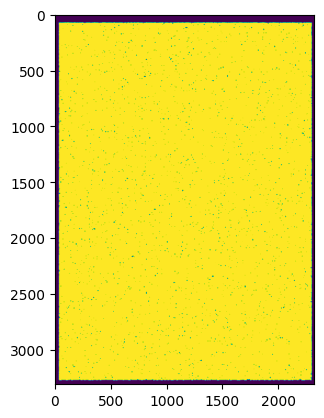

TypeError: Can't parse 'center'. Sequence item with index 0 has a wrong type

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json
import image_process as process

JSON_PATH = "./settings.json"

with open(JSON_PATH) as f:
    settings = json.load(f)

file = settings["file"]
image = cv2.imread(file["path"] + file["name"] + ".jpg")
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

crop_setting = settings["crop"]
crop_img = process.crop(gray_img, **crop_setting)

binary_thresh = settings["binarization"]["thresh"]
binary_img = process.binarization(crop_img, binary_thresh)

dilation_setting = settings["dilation"]
rotate_kernel_size = dilation_setting["kernel"]["toRotate"]
dilate_img = process.dilation(binary_img, rotate_kernel_size)

main_contour = process.get_main_contour(dilate_img)
angle, center = process.get_roation_angle(main_contour)
print(angle, center)

rotation_thresh = settings["rotation"]["thresh"]

plt.imshow(dilate_img)
plt.show()

if (angle > -rotation_thresh or angle < rotataion_thresh):
    rotate_img = process.rotate(crop_img, -angle, center)
    textbox_img = process.extract_textbox(rotate_img, settings)
else:
    textbox_img = process.extract_textbox(crop_img, settings)

denoise_settings = settings["denoise"]
denoise_img = process.denoise(textbox_img, **denoise_settings)

constrat_settings = settings["contrast"]
contrast_img = process.increase_contrast(denoise_img, **contrast_settings)

# 수직 방향의 픽셀들을 합친 값
hori_sum = np.sum(contrast_img, axis=1) / contrast.shape[0]
hori_thresh = np.min(hori_sum) + 15
hori_points = hori_sum < hori_thresh

check_start = None
check_end = None
hori_line_point = []



for idx, point in enumerate(hori_points):
    try:
        if point:
            if check_start == None:
                check_start = idx
            if hori_points[idx + 1] == False:
                check_end = idx + 1
                min_val = np.argmin(hori_sum[check_start:check_end]) + check_start
                hori_line_point.append(min_val)
                check_start = None
                check_end = None
    except IndexError:
        check_end = idx
        min_val = np.argmin(hori_sum[check_start:check_end]) + check_start
        hori_line_point.append(min_val)
        check_start = None
        check_end = None

vert_sum = np.sum(contrast_img, axis=0) / contrast.shape[1]

vert_thresh = np.min(vert_sum) + 15
vert_points = vert_sum < vert_thresh

check_start = None
check_end = None
vert_line_point = []


for idx, point in enumerate(vert_points):
    if point:
        if check_start == None:
            check_start = idx

        if idx == len(vert_points) - 1:
            check_end = idx
            min_val = np.argmin(vert_sum[check_start:check_end]) + check_start
            vert_line_point.append(min_val)
            check_start = None
            check_end = None
        elif not vert_points[idx + 1]:
            check_end = idx + 1
            min_val = np.argmin(vert_sum[check_start:check_end]) + check_start
            vert_line_point.append(min_val)
            check_start = None
            check_end = None

  
# (h, w) = dst.shape
# m = cv2.getRotationMatrix2D((h/2, w/2), 10, 1.0)
# rotate = cv2.warpAffine(dst, m, (h, w))

print(hori_line_point)
print(vert_line_point)

plt.imshow(contrast_img)
plt.title("Contrast")

# for point in hori_line_point:
#     plt.plot([0, contrast.shape[1] - 1], [point, point], color="red", linewidth=1)

# for point in vert_line_point:
#     plt.plot([point, point], [0, contrast.shape[0] - 1], color="red", linewidth=1)

plt.show()

# '`,.~-08BOD5S$

# 헷갈릴 글자 대상들
# 0 Γ
# 8 Δ
# 5 Σ
# $ -> § or 직접 폰트 수정
#  (공백) Ч
# ` §

# 절대로 헷갈리지 않을 만한 문자들
# 그리스어
# Γ Δ Ξ Σ